# Domácí úkol
## Část 1. Číselná spirála

Vytvořte čtvercovou matici o lichém počtu řádků a sloupců, která bude obsahovat čísla od 1 do $n^2$ tak, aby 1 byla uprostřed matice a číselná řada postupně narůstala po spirále proti směru hodinových ručiček.
- udělejte to pomocí NumPy přiřazování sliců do pole
- výstup musí být stejný jako primitivní funkce `integer_spiral` níže
- vyplňujte matici po "krůzích" okolo středu 
  - každý kruh je tvořen 4 částmi (hrana bez jednoho rohu)
  - využijte možnosti přiřazování sliců do pole a indexace s krokem -1
  - použijte `np.arange` pro vytvoření řady čísel kterou budete ukládat do hrany
- také si pomožte okrajem z 0, který nakonec oříznete

**Výsledná funkce bude mít tedy pouze jednu smyčku ve které do pole vstoupíme pouze 4x (jednou za každou hranu).** 

**Na závěr porovnejte rychlost vaší funkce s `integer_spiral` níže pomocí `%timeit` a různých výsledných velikostí matic (např. 101, 1001, 10001).**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# naplnění matice spirálou čísel
def integer_spiral(n):
    # abychom nemuseli řešit okraj = kontrolovat jestli jsme mimo matici
    # vytvoříme matici o velikosti n+2 x n+2
    # a vyplníme pouze středovou část
    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1  # počáteční pozice: střed matice
    pos_col = n//2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_col += 1  # posuneme se na první volné místo

    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů

    # return A[1:-1, 1:-1]  # ořízneme nulový okraj


In [ ]:
A = integer_spiral(9)
print(A)

48.9 μs ± 3.39 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


5.92 ms ± 456 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1 ms ± 110 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


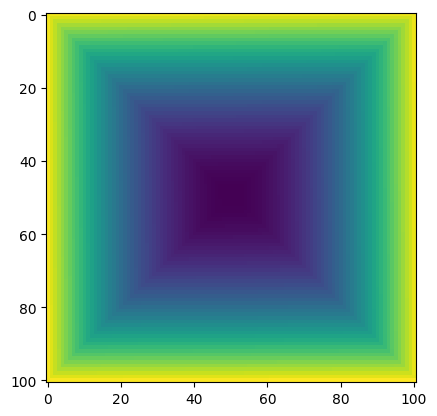

In [ ]:

def integer_spiral_numpy(n):
    n += 2
    if n % 2 == 0:
        print("n musí být liché")
        return False

    A = np.zeros((n, n))
    middle = n // 2
    A[middle, middle] = 1  # začátek spirály
    number_of_iterations = (n // 2) + 1
    mezera = 1
    i1 = 0
    cur_num = 2  # current number (in spiral)

    for i in range(1, number_of_iterations - 1):

        s1 = int((n // 2) + i1)  # start1
        e1 = s1 - mezera  # end1
        c = middle + i
        A[s1: (e1 - 1): -1, c] = np.arange(cur_num, cur_num + mezera + 1)
        cur_num = int(A[e1, c]) + 1

        s2 = int((n // 2) + i1)
        e2 = s2 - mezera
        r = middle - i
        A[r, s2: (e2 - 1): -1] = np.arange(cur_num, cur_num + mezera + 1)
        cur_num = int(A[r, e2]) + 1

        s3 = int((n // 2) - i1)
        e3 = s3 + mezera
        c = middle - i
        A[s3:(e3 + 1), c] = np.arange(cur_num, cur_num + mezera + 1)
        cur_num = int(A[e3, c]) + 1

        s4 = int((n // 2) - i1)
        e4 = s4 + mezera
        r = middle + i
        A[r, s4:(e4 + 1)] = np.arange(cur_num, cur_num + mezera + 1)
        cur_num = int(A[r, e4]) + 1

        mezera += 2
        i1 += 1

    
    # print(A[1:-1, 1:-1])  
    plt.imshow(A[1:-1, 1:-1])
    # return A

integer_spiral_numpy(101)




609 ms ± 19.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
[[1000001. 1000000.  999999. ...  999003.  999002.  999001.]
 [1000002.  996005.  996004. ...  995008.  995007.  999000.]
 [1000003.  996006.  992017. ...  991021.  995006.  998999.]
 ...
 [1000999.  997002.  993013. ...  994009.  994010.  998003.]
 [1001000.  997003.  997004. ...  998000.  998001.  998002.]
 [1001001. 1001002. 1001003. ... 1001999. 1002000. 1002001.]]
[[1000001. 1000000.  999999. ...  999003.  999002.  999001.]
 [1000002.  996005.  996004. ...  995008.  995007.  999000.]
 [1000003.  996006.  992017. ...  991021.  995006.  998999.]
 ...
 [1000999.  997002.  993013. ...  994009.  994010.  998003.]
 [1001000.  997003.  997004. ...  998000.  998001.  998002.]
 [1001001. 1001002. 1001003. ... 1001999. 1002000. 1002001.]]
[[1000001. 1000000.  999999. ...  999003.  999002.  999001.]
 [1000002.  996005.  996004. ...  995008.  995007.  999000.]
 [1000003.  996006.  992017. ...  991021.  995006.  998999.]
 ...


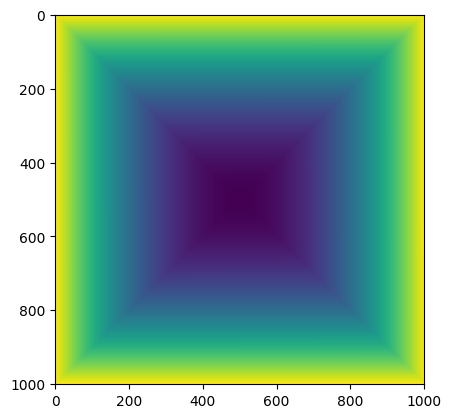

In [ ]:
# TODO otestujte rychlost obou implementací



## Část 2. Mandelbrotova množina
Vizualizujte Mandelbrotovu množinu na intervalu $[-2, 1] \times [-1.5, 1.5]$ pomocí `imshow`. Výsledek by měl vypadat jako následující obrázek.
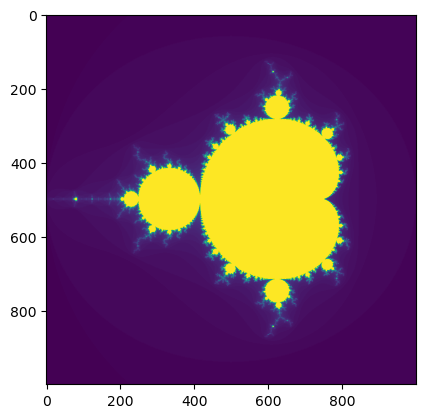

**Co je Mandelbrotova množina?**

Mandelbrotova množina je množina komplexních čísel $c$, pro které platí, že posloupnost $z_{i+1} = z_i^2 + c$ s $z_0 = 0$ konverguje (tj. $|z_i| < \infty$ pro všechna $n$).

**Co tedy udělat?**
- vytvořte matici $n\times n$ komplexních čísel $c$ na intervalu $[-2, 1] \times [-1.5, 1.5]$ (pomocí `np.mgrid` nebo `np.meshgrid`)
    - využite výhody vektorizace a toho, že numpy umí násobit komplexní čísla
- stanovit si počet iterací $k$, pro které budete testovat, zda posloupnost nedivergovala
    - to, že posloupnost diverguje, umíme pozorovat tak, že $|z_n| > 2$ pro nějaké $n$
- udělat $k$ iterací posloupnosti $z_{i+1} = z_i^2 + c$ a zjistit, kolikáté iteraci $k$ je se stalo, že $|z_i| < 2$
    - použijte pomocnou matici `divergence_matrix`, která bude mít stejný rozměr jako `c` a bude obsahovat počet iterací, kdy $|z_i| < 2$ pro každé $c$
- vytvořte obrázek pomocí `imshow` z `divergence_matrix`

In [7]:
def mandelbrot_set(x_min=-2, x_max=1, y_min=-1.5, y_max=1.5, n=3, k=100):
    real = np.linspace(x_min, x_max, n)  
    imag = np.linspace(y_min, y_max, n)  
    
    X, Y = np.meshgrid(real, imag)
    A = X + 1j * Y  
   

    K = np.zeros((n, n))
    
    Z = np.zeros((n, n), dtype=complex)
    for i in range (1, k):
        Z = (Z ** 2) + A
        mask0 = (np.abs(Z) > 2) & (K != 0)
        Z[mask0] = 0 
        mask = (np.abs(Z) > 2) & (K == 0) 
        K[mask] = i 
    return K





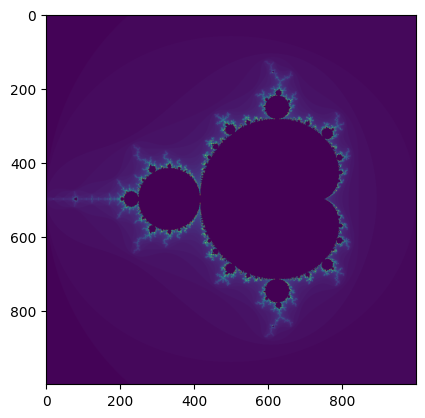

In [8]:
n = 1000
k = 100

divergence_matrix = mandelbrot_set(n=n, k=k)
plt.imshow(divergence_matrix)

# Bonus
1. Vykreslete také Juliovu množinu (viz. https://en.wikipedia.org/wiki/Julia_set)
2. Použijte váš kód pro číselnou spirálu a vytvořte obrázek prvočíselné spirály (viz. https://en.wikipedia.org/wiki/Ulam_spiral). Stačí vytvořit matici kde 

/tmp/ipykernel_10707/840614372.py:11: RuntimeWarning: overflow encountered in square
  Z = Z**2 + c
/tmp/ipykernel_10707/840614372.py:11: RuntimeWarning: invalid value encountered in square
  Z = Z**2 + c


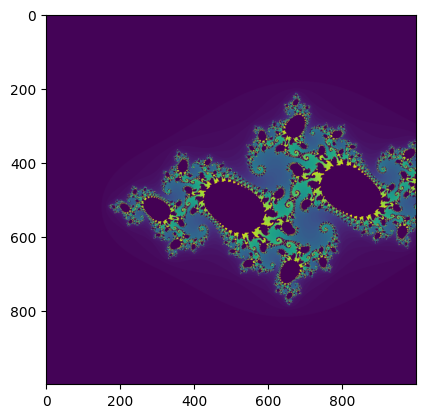

In [ ]:
def julia_set(x_min=-2, x_max=1, y_min=-1.5, y_max=1.5, n=1000, k=100, c=0+0j):
    real = np.linspace(x_min, x_max, n)
    imag = np.linspace(y_min, y_max, n) 
    
    X, Y = np.meshgrid(real, imag)
    Z = X + 1j * Y  

    K = np.zeros((n, n))

    for i in range(k):
        Z = Z**2 + c
        mask = (np.abs(Z) > 2) & (K == 0)  
        K[mask] = i  

    return K

n = 1000
k = 100
c = -0.74543 + 0.11301j

divergence_matrix = julia_set(n=n, k=k, c=c)
plt.imshow(divergence_matrix)

"""
Snažil jsem se, ale myslím, že to není dobře.
Tohle je nejdál, co jsem se stihnul dostat...
"""


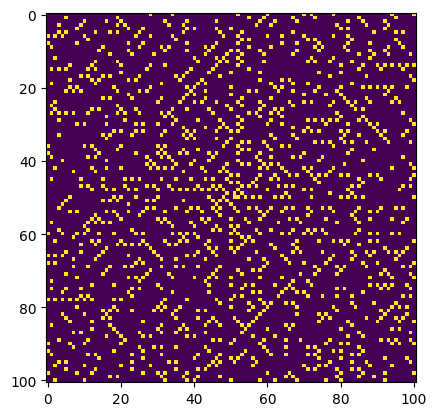

In [10]:
import numpy as np
import matplotlib.pyplot as plt


def is_prime(num):
    if num <= 1:
        return 0  
    for i in range(2, int(num**0.5) + 1):
        if num % i == 0:
            return 0  
    return 1  

def integer_spiral_prime_numpy(n):
    n += 2
    if n % 2 == 0:
        print("n musí být liché")
        return False

    A = np.zeros((n, n))
    middle = n // 2
    A[middle, middle] = 1  # začátek spirály
    number_of_iterations = (n // 2) + 1
    mezera = 1
    i1 = 0
    cur_num = 2  # current number (in spiral)

    for i in range(1, number_of_iterations - 1):

        s1 = int((n // 2) + i1)  # start1
        e1 = s1 - mezera  # end1
        c = middle + i
        A[s1: (e1 - 1): -1, c] = np.arange(cur_num, cur_num + mezera + 1)
        cur_num = int(A[e1, c]) + 1

        s2 = int((n // 2) + i1)
        e2 = s2 - mezera
        r = middle - i
        A[r, s2: (e2 - 1): -1] = np.arange(cur_num, cur_num + mezera + 1)
        cur_num = int(A[r, e2]) + 1

        s3 = int((n // 2) - i1)
        e3 = s3 + mezera
        c = middle - i
        A[s3:(e3 + 1), c] = np.arange(cur_num, cur_num + mezera + 1)
        cur_num = int(A[e3, c]) + 1

        s4 = int((n // 2) - i1)
        e4 = s4 + mezera
        r = middle + i
        A[r, s4:(e4 + 1)] = np.arange(cur_num, cur_num + mezera + 1)
        cur_num = int(A[r, e4]) + 1

        mezera += 2
        i1 += 1

    
    is_prime_vec = np.vectorize(is_prime)
    mask = is_prime_vec(A)  # Maskování (True pro prvočísla, False jinak)
    A = np.where(mask, 1, 0)
    plt.imshow(A[1:-1, 1:-1])


integer_spiral_prime_numpy(101)